# The goal of this notebook to develop a machine learning model that can predict the reduction potentials of molecules based on the molecular fingerprints and descriptors

In [140]:
import pandas as pd
pd.set_option('display.max_columns', None)
import Chemfunctions as chemfun
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit.Chem as Chem

# Download data from the github repo

In [141]:
url="https://raw.githubusercontent.com/akashjn/DataScience/main/Data/BTZ_5442mols_smiles_redpot.csv"
df=pd.read_csv(url)
# df=df.sample(n=1000,ignore_index=True)
# df=df[:1000]
df.head()

,SMILES,ERed
0,Cc1c2c(cc3nsnc13)N(C)CCN2CCN(C)C,1.27
1,CCN1CCN(CCOC)c2c1cc1nsnc1c2C,1.27
2,CCNc1c2c(cc3nsnc13)N(C)CCN2C(C)C,1.24
3,CCCN1CCN(CC)c2cc3nsnc3c(NCC)c21,1.22
4,CCNc1c2c(cc3nsnc13)N(CC)CCN2C(C)C,1.20


# Find duplicate SMILES in the df
## A molecule can be represented by more than one SMILES string, so let's re-write SMILES in the canonical (standard) form and remove any duplicate SMILES

In [142]:
df=chemfun.remove_duplicate_smiles(df=df,smi="SMILES")

Removed 0 duplicate SMILES from the given df


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  5442 non-null   object 
 1   ERed    5442 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.2+ KB


# Data Exploration: Let's check the distribution of ERed
- df has the reduction potentials of 5442 molecules 

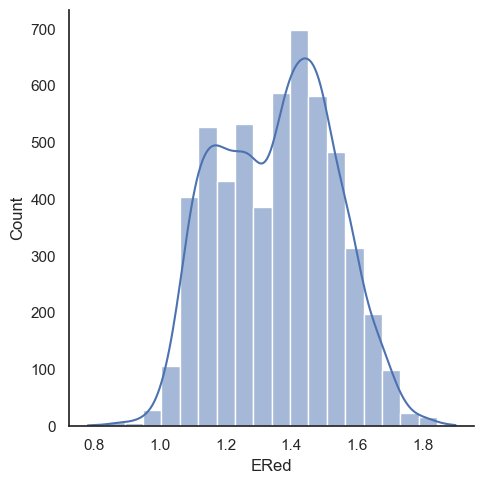

In [144]:
sns.displot(df,x="ERed",kde=True,bins=20)
plt.show()

In [145]:
df.ERed.describe()

count    5442.000000
mean        1.353532
std         0.176192
min         0.780000
25%         1.210000
50%         1.370000
75%         1.490000
max         1.900000
Name: ERed, dtype: float64

**In the dataset, the mean, std and median ERed of 5442 molecules is 1.35, 0.18, and 1.37, respectively**

# Represent molecules in terms of the molecular descriptors 

## We will use the rdkit library to generate molecular descriptors
- RDkit_descriptors() is a function in the Chemfunctions.py

In [146]:
# call function
Mol_descriptors,desc_names = chemfun.RDkit_descriptors(smiles=df.SMILES)
df_rdkit = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,4.456023,1.020889,4.456023,1.020889,0.861773,291.424,270.256,291.151767,108,0,0.109421,-0.371076,0.371076,0.109421,1.300000,2.100000,2.850000,32.140682,10.056719,2.243910,-2.382209,2.387529,-2.421053,6.996096,0.412244,2.063612,621.296943,14.275656,12.550094,13.366590,9.575387,6.943478,7.673774,5.713135,6.241583,3.990306,4.532875,2.790050,3.370123,-1.40,50883.396945,13.577001,5.179478,2.226066,123.668114,14.699729,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,8.74708,0.0,0.000000,27.085448,38.790149,23.102960,0.000000,34.136361,0.0,13.64699,0.0,6.923737,57.121861,11.629819,0.0,0.0,9.799819,11.374773,0.0,11.728187,60.969031,0.000000,6.923737,5.563451,6.066367,0.0,11.033401,0.0,35.50,0.0,0.0,0.0,0.0,0.000000,37.212427,28.666411,0.000000,0.0,57.579929,0.000000,8.854512,1.301269,7.048598,0.000000,5.955116,0.0,2.183519,0.000000,6.418928,6.404726,0.571429,20,0,5,0,1,1,1,1,2,6,0,6,3,0,0,0,3,1.81752,86.1890,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.243940,0.748371,5.243940,0.748371,0.864637,292.408,272.248,292.135782,108,0,0.109421,-0.382853,0.382853,0.109421,1.300000,2.100000,2.850000,32.140682,10.052673,2.253246,-2.390295,2.392744,-2.423841,6.996097,0.204850,2.122519,612.484865,14.112520,12.218235,13.034732,9.757550,7.005867,7.736164,5.060772,5.589220,3.984172,4.526742,2.920064,3.500137,-1.40,63046.529091,13.577001,5.535354,2.125124,123.021825,14.536682,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,8.747

# Data Cleaning

1. Remove columns with NaN
2. Remove duplicate columns
3. Remove columns with unique values
4. Remove columns with low std
5. Remove highly correlated features


In [147]:
print(f'Shape of the df_rdkit before cleaning: {df_rdkit.shape}')
df_rdkit=chemfun.remove_nan_columns(df=df_rdkit)
df_rdkit=chemfun.remove_duplicate_columns(df=df_rdkit)
df_rdkit=chemfun.remove_columns_uniquevalues(df=df_rdkit)
df_rdkit=chemfun.remove_columns_low_std(df=df_rdkit)
df_rdkit=chemfun.remove_corr_features(df=df_rdkit,corr_cutoff=0.8)
print(f'Shape of the df_rdkit after cleaning: {df_rdkit.shape}')

Shape of the df_rdkit before cleaning: (5442, 208)
Removed 0 columns with nan
Removed 0 duplicate columns
Removed 84 columns values with a unique value
Removed 27 columns with std < 0.3 
Dropped 52 features with correlation coeff. > 0.80
Shape of the df_rdkit after cleaning: (5442, 45)


# With some data cleaning we were able to reduce the number of descriptors from 208 to 10

## we removed features with pearson corr. coeff. > 0.5 to reduce the number of features and better visulaization. 

In [148]:
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MolWt,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA10,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SlogP_VSA3,SlogP_VSA4,SlogP_VSA6,TPSA,EState_VSA1,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,VSA_EState2,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,MolLogP,fr_Ndealkylation1,fr_aryl_methyl,fr_bicyclic,fr_methoxy,fr_unbrch_alkane
0,4.456023,1.020889,291.424,14.699729,11.033401,0.0,0.0,0.0,0.0,0.0,0.000000,27.085448,38.790149,23.102960,34.136361,13.64699,0.0,6.923737,57.121861,0.000000,6.923737,6.066367,35.50,0.0,0.000000,37.212427,28.666411,0.000000,0.0,57.579929,7.048598,5.955116,0.0,0.000000,6.418928,6.404726,0,0,1,1.81752,2,1,2,0,0
1,5.243940,0.748371,292.408,14.536682,11.033401,0.0,0.0,0.0,0.0,0.0,0.000000,19.913841,38.852275,29.709842,34.136361,8.74708,0.0,13.847474,49.695525,4.736863,6.923737,6.066367,41.49,0.0,0.000000,43.819309,28.666411,7.109798,0.0,38.460741,4.836841,5.871127,0.0,0.000000,9.134667,1.753581,0,0,1,2.29242,1,1,2,1,0
2,4.487068,0.475834,291.424,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,0.000000,26.837579,32.723782,28.790346,39.823748,8.74708,0.0,26.813052,41.798549,0.000000,0.000000,6.066367,44.29,0.0,6.041841,36.355057,23.102960,0.000000,0.0,57.748939,4.777731,5.643154,0.0,0.000000,9.584423,2.150651,1,0,1,2.78770,1,0,2,0,0
3,4.513689,0.897986,305.451,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,6.923737,26.334663,32.723782,28.790346,39.823748,8.74708,0.0,27.192033,47.840390,0.000000,0.000000,6.066367,44.29,0.0,0.000000,55.865391,23.102960,0.000000,0.0,50.701267,4.943843,5.788754,0.0,1.157225,11.767929,0.000000,1,0,1,3.17940,1,0,2,0,0
4,4.512897,0.476118,305.451,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,0.000000,33.761316,32.220866,28.790346,39.823748,8.74708,0.0,33.736790,41.295634,0.000000,0.000000,6.066367,44.29,0.0,6.041841,42.899813,23.102960,0.000000,0.0,57.625004,4.922731,5.724360,0.0,0.000000,12.885515,0.000000,1,0,1,3.17780,1,0,2,0,0


TODO: Scale data, and Train a linear regression model

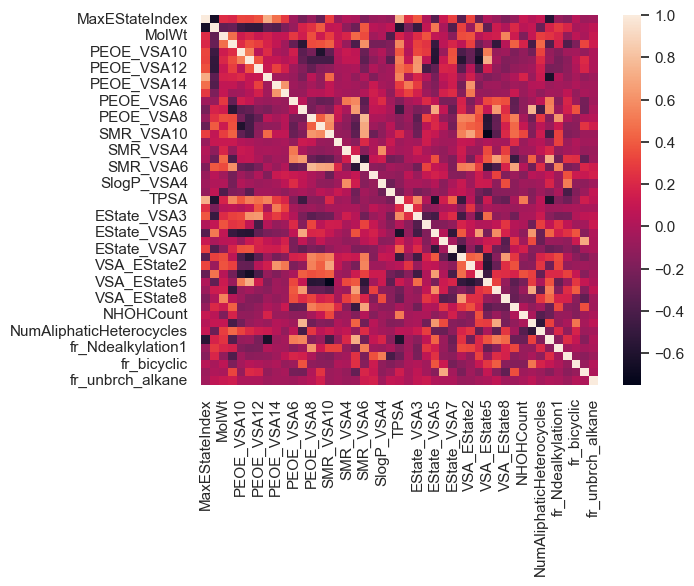

In [149]:
sns.heatmap(df_rdkit.corr())
plt.show()

# Let's make pairplot to visualize the relationship between independent variables

In [150]:
# sns.pairplot(data=df_rdkit,diag_kind='kde')
# plt.show()

# Let's find out which of the features have normal distribution with the Shapiro-Wilk Test

In [151]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

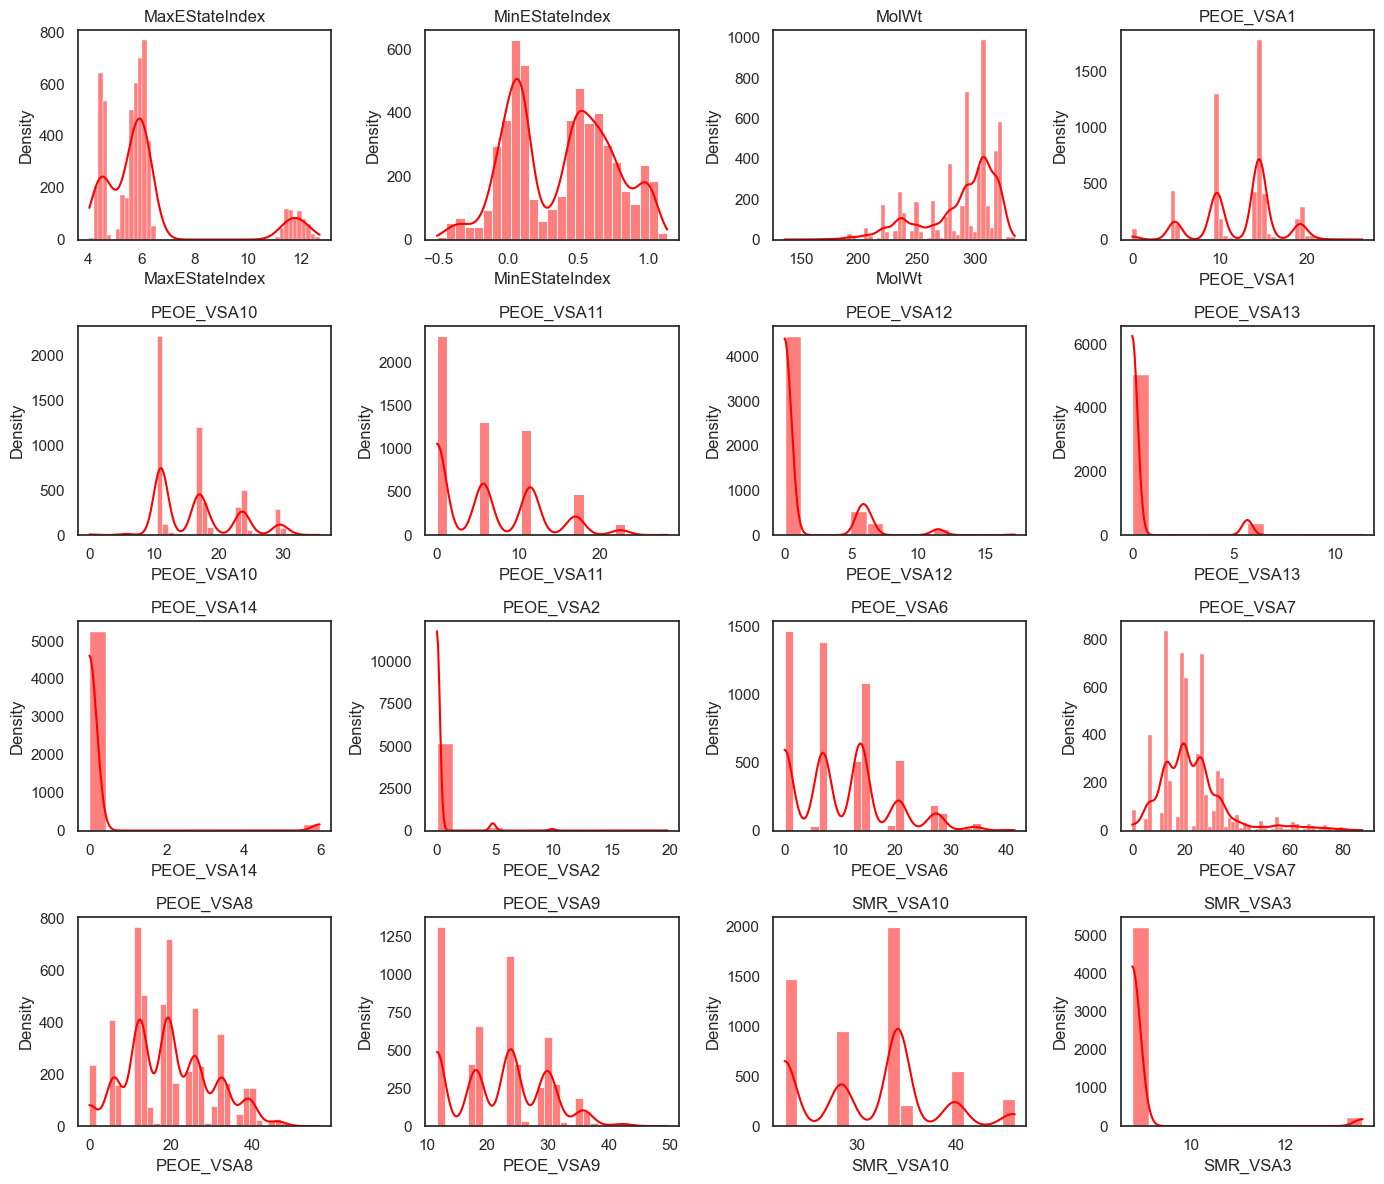

In [152]:
nr_rows = 4
nr_cols = 4
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(df_rdkit.columns.to_list()):
            col=df_rdkit.columns.to_list()[i]
            sns.histplot(df_rdkit[col],ax=axs[r][c],color="red",kde=True)
            axs[r][c].set_xlabel(col)
            axs[r][c].set_ylabel(f'Density')
            axs[r][c].set_title(col)
        else:
            fig.delaxes(axs[r][c])
            
plt.tight_layout()    
# # plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

# None of the features look normally distributed from the hist/kde plots

In [153]:
# import importlib
# importlib.reload(chemfun)

# Let's try statistical tests

## let's confirm the hypothesis that our distribution is not normal. by running different normality tests, such as D'Agostino-Pearson , Shapiro-Wilk and Anderson tests.

In [154]:
df_=chemfun.check_normality_feat(df=df_rdkit,alpha=0.05,test="shapiro")
df_["Normal_dist"].sum()

Shapiro-Wilk test of normality
0 features are normally distributed
Returning a dataframe with ['Feature', 'Normal_dist', 'W_stat', 'p-value'] columns


c:\Users\jaina\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0

In [155]:
df_=chemfun.check_normality_feat(df=df_rdkit,alpha=0.05,test="agostino")
df_["Normal_dist"].sum()

D'Agostino K2 test of normality
0 features are normally distributed
Returning a dataframe with ['Feature', 'Normal_dist', 'K2_stat', 'p-value'] columns


0

# From both the statistical tests, we find that none of the selected features are normally distributed
*we will apply log, cubic root transform to features after training the linear reg. (baseline) model*

# Feature selection 

*We will use the p-values of individual regression coeff to select the imp features*

To get the overall F-statistic of the model and the p-values we require the model summary. Unfortunately, we don't get that from the sklearn model. So we will use statsmodels.

[Ref1: Implement OLS in sm](https://www.statology.org/sklearn-linear-regression-summary/)

[Ref2: How to interpret the linear regression p-values](https://www.statology.org/linear-regression-p-value/)

# 1. with sklearn

In [156]:
from sklearn.linear_model import LinearRegression

df_rdkit_scaled=chemfun.do_scaling(xtrain=df_rdkit) # Standard Scaling 

model=LinearRegression()

model.fit(X=df_rdkit_scaled,y=df["ERed"])

print(f"intercept = {(model.intercept_):0.2f},\nmodel coeff. = {model.coef_},\nR^2 = {(model.score(X=df_rdkit_scaled,y=df['ERed'])):0.2f}")

test data is not provided, returning only scaled train data
intercept = 1.35,
model coeff. = [ 0.03121814  0.01126535 -0.6509107  -0.15372359  0.09854808  0.12092004
  0.07086056  0.01853967  0.04560748 -0.00975716  0.05479404  0.1253913
  0.12363535  0.08189323 -0.17987293 -0.01019862  0.04886792  0.35198655
  0.44275444  0.01620661  0.0037359   0.0646172   0.50648851 -0.00304485
  0.02930512  0.02312722  0.02406914  0.00281224 -0.00716168 -0.01288138
 -0.03848254 -0.10370538 -0.06050634  0.09224037  0.26874552  0.23082093
 -0.08859534  0.06759864  0.01831931  0.02489151  0.01671107 -0.0008238
  0.03178299 -0.01317663 -0.00358297],
R^2 = 0.79


In [157]:
import statsmodels.api as sm

#define response variable
y=df["ERed"]

#define predictor variables
x=df_rdkit_scaled

#add constant to predictor variables
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()

print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                   ERed   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     440.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:43:54   Log-Likelihood:                 5920.7
No. Observations:                5442   AIC:                        -1.175e+04
Df Residuals:                    5396   BIC:                        -1.145e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**With statsmodel we get detailed summary. we will use the P>|t| values for feature selection**

# Split the dataset into training and test datasets

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_rdkit,df["ERed"],test_size=0.3, random_state=42)
print(f'X_train.shape = {X_train.shape}, X_test.shape = {X_test.shape}, y_train.shape = {y_train.shape}, y_test.shape = {y_test.shape}')

X_train.shape = (3809, 45), X_test.shape = (1633, 45), y_train.shape = (3809,), y_test.shape = (1633,)


# Do scaling

In [159]:
X_train,X_test=chemfun.do_scaling(xtrain=X_train,xtest=X_test)
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

returning scaled train and test data


# Feature Selection based on the p-values
## H0 (null hypothesis) all features have a statistically significant relationship with the target variable

*After implementing the linear regression with all features, if we find that the p-value of any feature is smaller than the alpha = 0.05 (95% confidence interval) or p < 0.05, then it suggests that the feature has a statistically significant relationship with the target variable at an alpha level of 0.05*

In [160]:
alpha = 0.05

features=X_train.columns
print(f'initial number of features = {len(features)}')

y=y_train

for iter in np.arange(3):
    
    x=X_train.loc[:,features]
    x=sm.add_constant(x)

    model=sm.OLS(y,x).fit()
    
    p_values = model.summary2().tables[1]['P>|t|'][1:] < alpha # 0 the element is for the constant 
    
    # remove columns with p-values > 0.05
    features=features[p_values]
    print(f'iter = {iter}, number of features left = {len(features)}')

print(f'features left = {features}')


initial number of features = 45
iter = 0, number of features left = 21
iter = 1, number of features left = 17
iter = 2, number of features left = 17
features left = Index(['MaxEStateIndex', 'MinEStateIndex', 'PEOE_VSA1', 'PEOE_VSA14',
       'SMR_VSA10', 'SlogP_VSA6', 'TPSA', 'EState_VSA1', 'EState_VSA3',
       'VSA_EState4', 'VSA_EState5', 'VSA_EState8', 'VSA_EState9',
       'NumAliphaticHeterocycles', 'fr_Ndealkylation1', 'fr_bicyclic',
       'fr_methoxy'],
      dtype='object')


# We will now work with the selected 24 features

# Linear Model

Let's compare the performance of the linear regression model with all 41 and 24 selected features

In [161]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression().fit(X_train,y_train)
model2=LinearRegression().fit(X_train.loc[:,features],y_train)



In [162]:
ytest_pred1=model1.predict(X_test)
ytest_pred2=model2.predict(X_test.loc[:,features])

In [163]:
from sklearn.metrics import mean_squared_error as mse

Train, R^2 model1 = 0.79
Test, R^2 model1 = 0.78


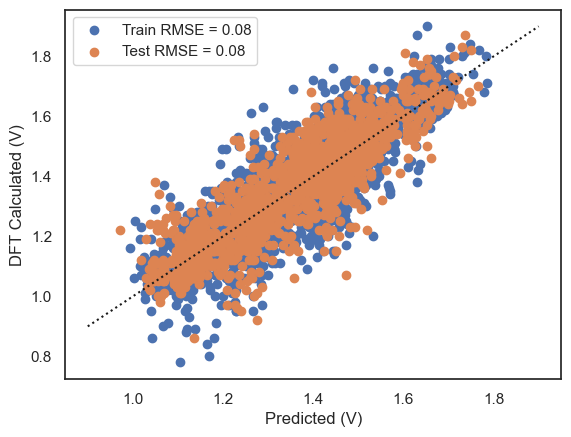

In [173]:
print(f'Train, R^2 model1 = {model1.score(X=X_train,y=y_train):0.2f}')
print(f'Test, R^2 model1 = {model1.score(X=X_test,y=y_test):0.2f}')
plt.scatter(model1.predict(X_train),y_train,label=f"Train RMSE = {np.sqrt(mse(y_train,model1.predict(X_train))):0.2f}")
plt.scatter(ytest_pred1,y_test,label=f"Test RMSE = {np.sqrt(mse(y_test,ytest_pred1)):0.2f}")
plt.plot([0.9,1.9],[0.9,1.9],':k')
plt.xlabel('Predicted (V)')
plt.ylabel('DFT Calculated (V)')
plt.legend()
plt.show()

Train, R^2 model2 = 0.74
Test, R^2 model2 = 0.73


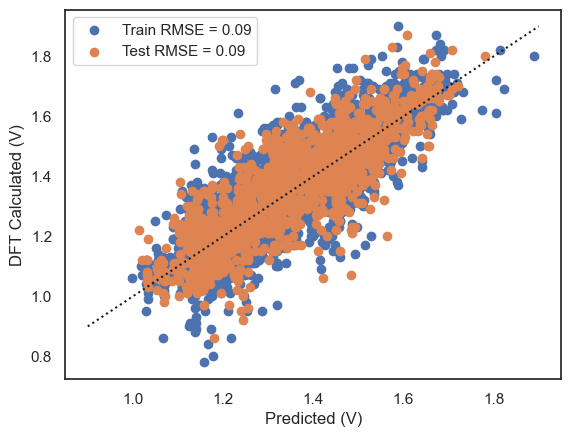

In [174]:
print(f'Train, R^2 model2 = {model2.score(X=X_train.loc[:,features],y=y_train):0.2f}')
print(f'Test, R^2 model2 = {model2.score(X=X_test.loc[:,features],y=y_test):0.2f}')
plt.scatter(model2.predict(X_train.loc[:,features]),y_train,label=f"Train RMSE = {np.sqrt(mse(y_train,model2.predict(X_train.loc[:,features]))):0.2f}")
plt.scatter(ytest_pred2,y_test,label=f"Test RMSE = {np.sqrt(mse(y_test,ytest_pred2)):0.2f}")
plt.plot([0.9,1.9],[0.9,1.9],':k')
plt.xlabel('Predicted (V)')
plt.ylabel('DFT Calculated (V)')
plt.legend()
plt.show()

# Residual

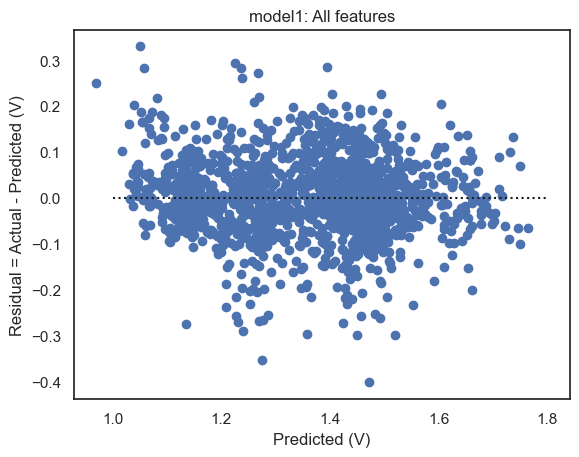

In [175]:
plt.scatter(ytest_pred1,(y_test-ytest_pred1))
plt.plot([1,1.8],[0,0],':k')
plt.title('model1: All features')
plt.xlabel('Predicted (V)')
plt.ylabel('Residual = Actual - Predicted (V)')
plt.show()

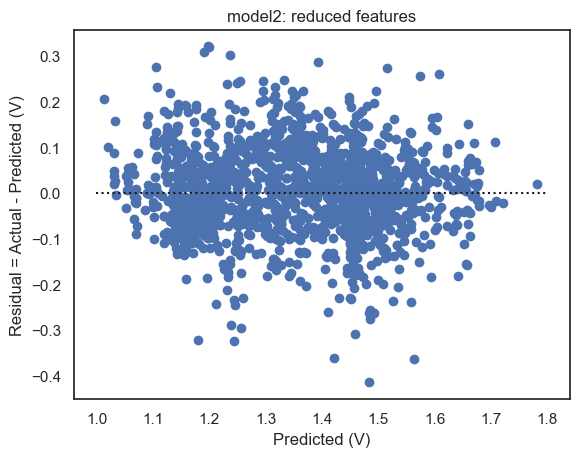

In [176]:
plt.scatter(ytest_pred2,(y_test-ytest_pred2))
plt.plot([1,1.8],[0,0],':k')
plt.title('model2: reduced features')
plt.xlabel('Predicted (V)')
plt.ylabel('Residual = Actual - Predicted (V)')
plt.show()

# Errors/Residuals are randomly distributed

# Compare the performance of other models 
- use pipeline
- use CV
- tune hyperparameter